# Linear Regression using Gradient Descent optimization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate the data

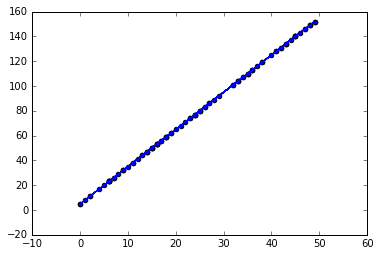

In [2]:
# Simple linear regression of the form (y = ax +b)
a = 3
b = 5

x = np.random.randint(0.,50.,100)
y = a*x+b
plt.scatter(x,y)
plt.plot(x,y)

## Define the Gradient Descent regression to approximate the "true" function

In [3]:
# Defining the error function which will be minimized using gradient descent
# Compute the sum of squared errors (Input: array of true y-values and array of predicted y-values)

def sse(y,y_pred):
    return ((y-y_pred)**2).sum()

def avg_loss(y,x,a,b):
    return np.sqrt(sse(y,(a*x+b))/len(y))

![](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)

In [4]:
#Start with random guess of regression parameters a and b

a_guess = 1 
b_guess = -100
avg_loss(y,x,a_guess,b_guess)

156.33617623570049

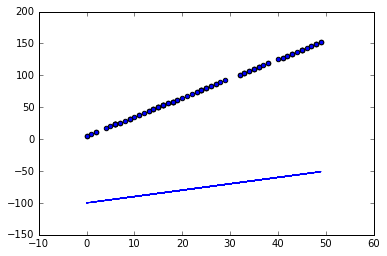

In [5]:
y_guess = a_guess*x+b_guess
plt.scatter(x,y)
plt.plot(x,y_guess)

In order to minimize the loss/ error function we will need to adjust the parameters a and b. To decide in which direction to adjust the parameters to reach a local minimum for the error, we need to compute the partial derivatives of the error function.

![](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)

In [6]:
# Compute Gradients for b and a and adjust parameters
def gradient(y,x,a,b,learning_rate):
    N = len(y)
    b_gradient = (-2./N)*(y - ((a * x) + b)).sum() 
    a_gradient = (-2./N)*((x*(y - a * x - b)).sum())
    new_a = a-(learning_rate * a_gradient)
    new_b = b-(learning_rate * b_gradient)
    loss = avg_loss(y,x,new_a,new_b)
    return new_a,new_b, loss

def run_gradient(y,x,a_guess,b_guess,learning_rate=0.001,num_iterations = 10,verbose=True):
    a = a_guess
    b = b_guess
    for i in range(0,num_iterations):
        a ,b, loss = gradient(y,x,a,b,learning_rate)
        y_pred = a*x+b
        if verbose:
            print loss
    return a,b,loss

In [7]:
a_est,b_est,loss=run_gradient(y,x,a_guess,b_guess)

102.137869051
74.0803645627
61.1696330881
55.8912575046
53.8888106378
53.1470989708
52.8656154771
52.7486045595
52.6899145204
52.6518516888


The gradient descent optimisation seems to work since the average loss is being reduced.

In [8]:
m,c,loss=run_gradient(y,x,a_guess,b_guess,verbose=False,num_iterations = 10000)

In [9]:
print "a: ",m
print "b: ",c
print "loss: ",loss

a:  3.01973359553
b:  4.35518653679
loss:  0.325445813805


Great, the approximated parameters almost match the "true" parameters and the loss is minimal!

## Gradient descent regression animation

Let's visualize what's going on under the hood.

In [10]:
def upd():
    global a_guess,b_guess
    learning_rate = 0.001
    N = len(y)
    b_gradient = (-2./N)*(y - ((a_guess * x) + b_guess)).sum() 
    a_gradient = (-2./N)*((x*(y - a_guess * x - b_guess)).sum())
    a_guess = a_guess-(learning_rate * a_gradient)
    b_guess = b_guess-(learning_rate * b_gradient)


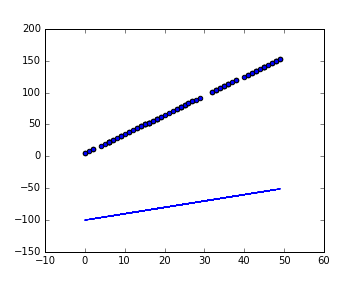
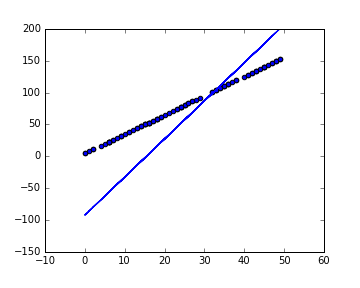
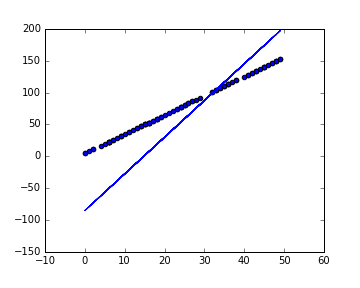
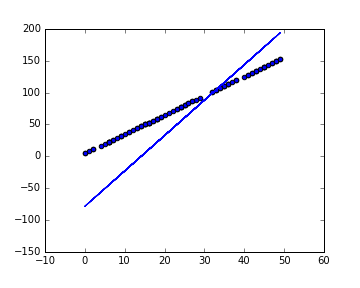
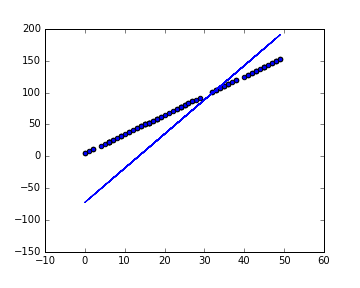
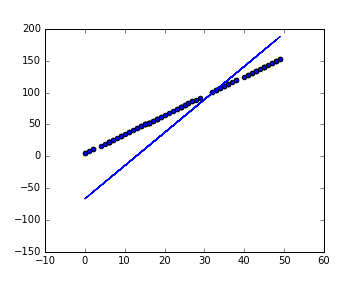
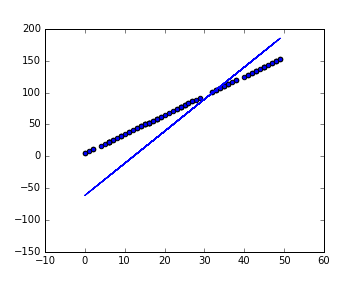
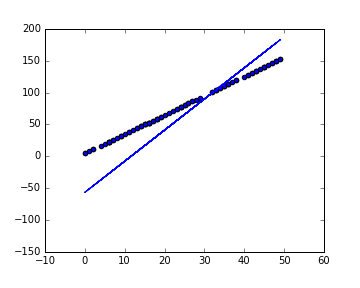
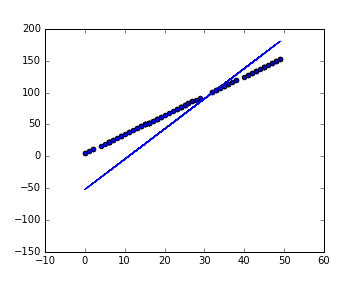
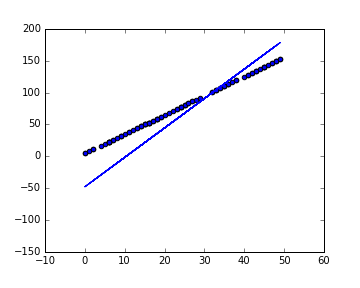
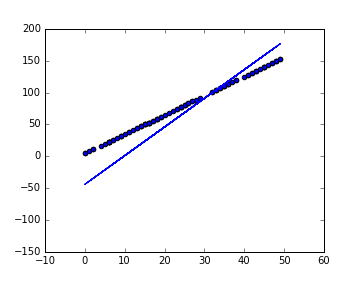
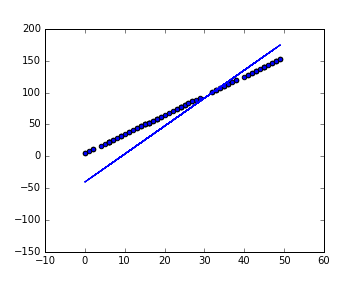
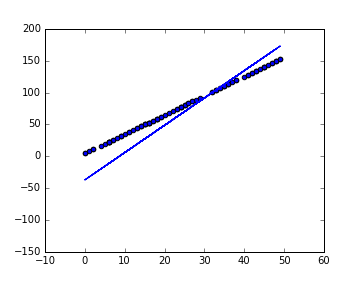
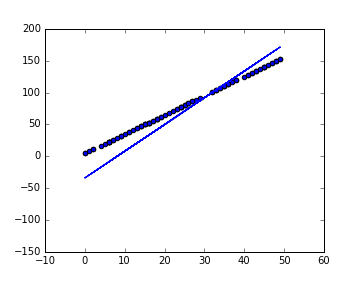
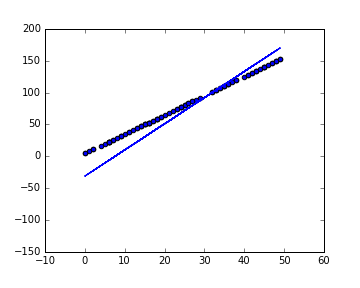
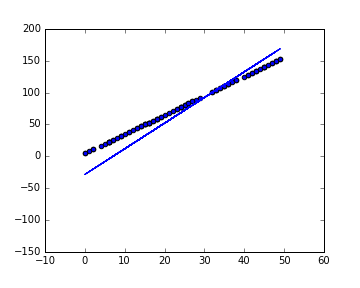
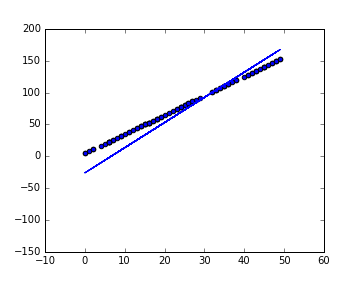
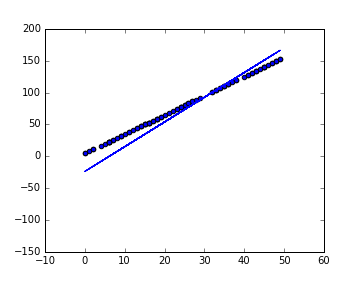
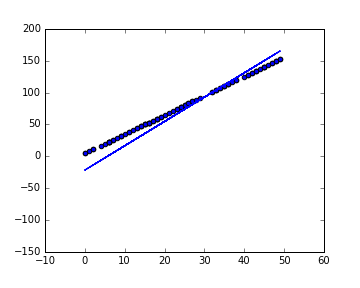
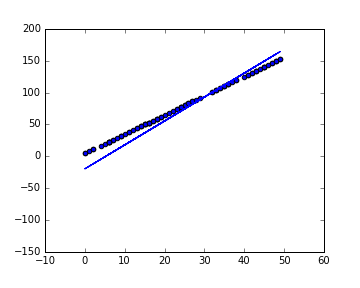
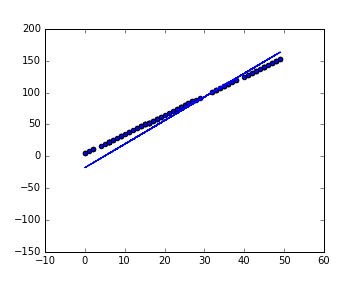
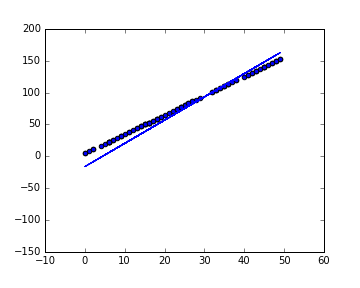
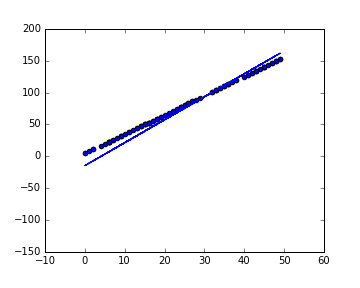
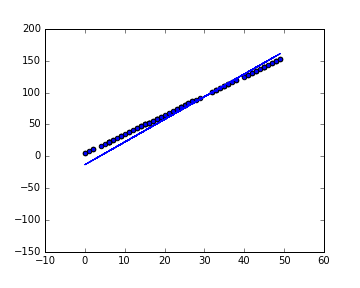
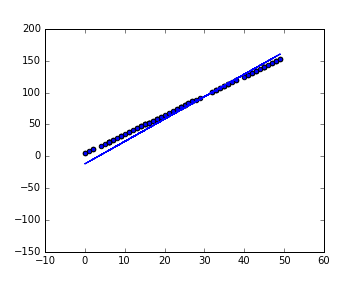
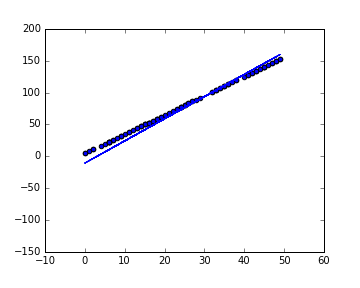
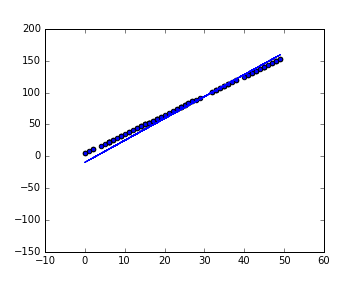
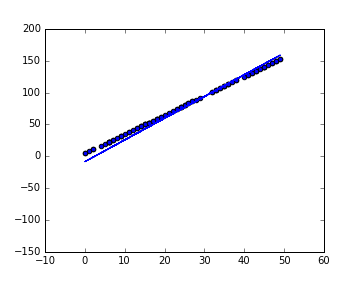
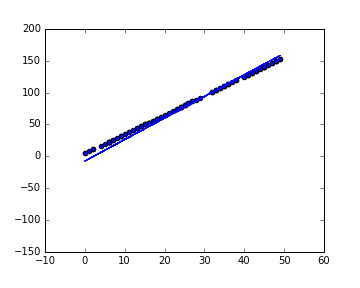
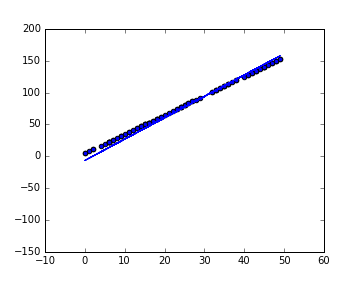
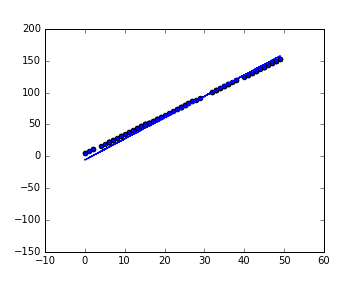
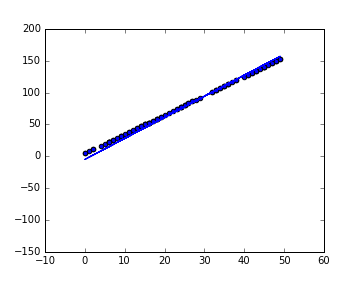
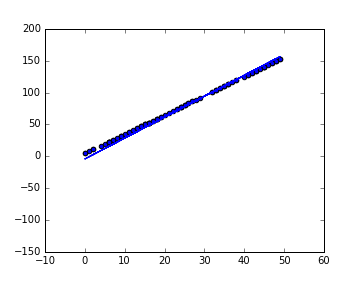
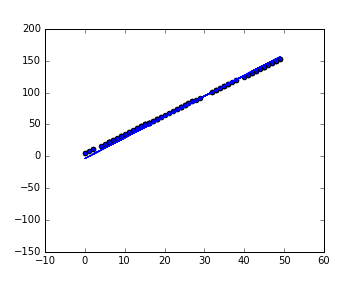
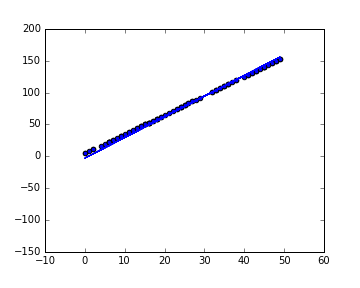
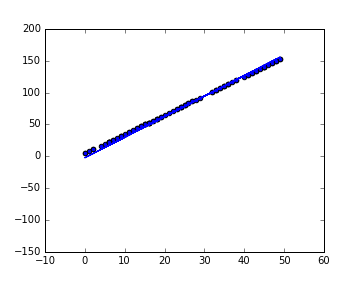
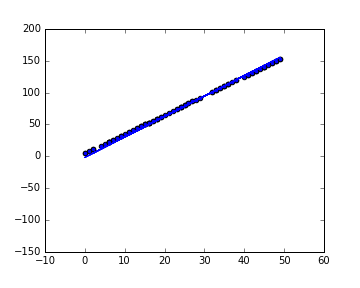
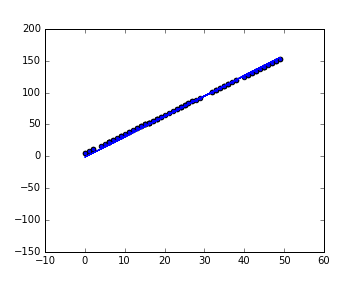
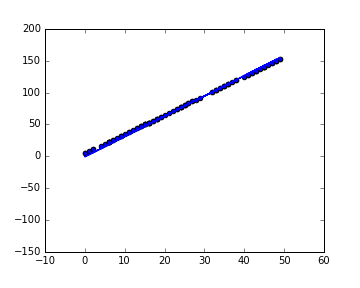
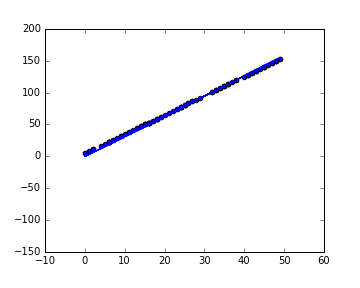

In [11]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure(dpi = 100,figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x,a_guess*x+b_guess)
plt.close()

def init():
    line.set_data([], [])
    return (line,)
    
def animate(i):
    line.set_data(x,a_guess*x+b_guess)
    for i in range(150): upd()
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0,40), interval=100, blit=True)
anim